## mamographic ?

Mammography is the process of using low-energy X-rays to examine the human breast for diagnosis and screening. 
The goal of mammography is the early detection of breast cancer, typically through detection of characteristic masses or microcalcifications.
[wikipedia](https://en.wikipedia.org/wiki/Mammography)

##  Let's  Predict whether a mammogram mass is benign or malignant

Have download the "mammographic masses" public dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

To know more about the dataset description. [dataset description](https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.names)

Let's Jump into the implementation using the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare the dataset

Importing the mammographic_masses.data file into a Pandas dataframe

In [4]:
massesdata = pd.read_csv('mammographic_masses.data')

In [5]:
massesdata.head(5)

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


#### Dataset having without columns name and missing data. According to dataset description. we can map the data columns. Also, convert missing data ('?') to NaN

In [6]:
massesdata = pd.read_csv('mammographic_masses.data', names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'], na_values=['?'])
massesdata.head(5)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


## Data Visualization
For missing values

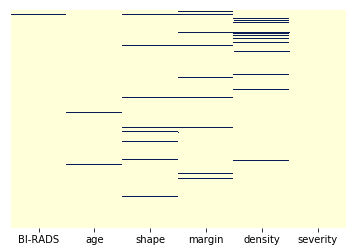

In [7]:
# Check Missing Data
sns.heatmap(massesdata.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [8]:
massesdata.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [9]:
massesdata.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

#### Cleaning the data

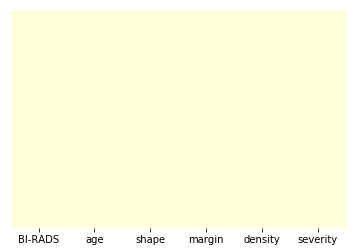

In [10]:
massesdata.dropna(inplace=True)
sns.heatmap(massesdata.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

## Train Model

This is a binary classification problem. so we can try Logistic Regression model.

In [11]:
# let's convert the data(massesdata) into numpy arrays
features = massesdata[['age', 'shape', 'margin', 'density']].values

# lable 
classes = massesdata['severity'].values

# Features
featurenames = ['age', 'shape', 'margin', 'density']

features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [12]:
# Normalize the data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, classes, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
prediction = model.predict(X_test)

## Model evaluation metrics

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83       133
          1       0.78      0.87      0.82       116

avg / total       0.83      0.83      0.83       249



####  confusion_matrix : 
Its describes the performance of a classification model. Mostly useful for multi-class problems.

In [26]:
# confusion_matrix: This produces a 2x2 Matrix
print(confusion_matrix(y_test,prediction))

[[105  28]
 [ 15 101]]


### Whereas, 
- True Positives (TP=101) From the matrix, correctly predicted that have malignant 
- True Negatives (TN=105) From the matrix, correctly predicted that don't have malignant 
- False Positives (FP=28) From the matrix, incorrectly predicted that have malignant ("Type I error") 
- False Negatives (FN=15) From the matrix, incorrectly predicted that don't have malignant ("Type II error")

In [27]:
TP = 101
TN = 105
FP = 28
FN = 15
print('Classification Accuracy using confusion_matrix: ', (TP + TN) / float(TP + TN + FP + FN))

Classification Accuracy using confusion_matrix:  0.8273092369477911


In [28]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error using confusion_matrix: ',classification_error)

Classification Error using confusion_matrix:  0.17269076305220885


#### This is a classification problems: 
Classification accuracy

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy = accuracy_score(y_test, prediction)
print('Classification Accuracy using accuracy_score: ',accuracy)

Classification Accuracy using accuracy_score:  0.8273092369477911


Classification accuracy is 82%

In [31]:
print('Classification Error using accuracy_score: ',1 - accuracy_score(y_test, prediction))

Classification Error using accuracy_score:  0.17269076305220887


## Model evaluation
Using K-fold cross-validation
#####  K-Fold cross validation to get a better estimate of the model's accuracy (K=10).

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(model, features_scaled, classes,  cv=10) 

In [34]:
scores.mean()

0.8073583532737221